#  DATA ANALYTICS AND PREDICTION OF NSW HOUSE PRICE

**Project Owner: Brian Ong**
Sydney, 7th May 2024

I.	Introduction
1.	Overview of the Project:
The primary purpose of the project is to analyze the housing market in order to provide the most suitable options for individuals interested in investing the real estate market. Additionally, it aims to identify the most affordable housing options and general insights for potential customers. However, due to the size and reliability of the dataset, all information and result provided is mainly used for practice purposes.
Furthermore, the project involves making predictions for the housing market in the near future. These predictions are compared with other machine learning models to illustrate the most objective results. We aim to provide valuable guidance to individuals considering real estate investment, helping them make informed decisions based on current market trends and future predictions
2.	Objectives of the Project and Define the problem
To address three primary questions:
•	How has the house pricing market in NSW been evolving in recent years?
•	What is the relationship between each variable provided in the dataset?
•	How do different machine learning models perform in predicting house prices, their effectiveness, and the current trends (as of 2022)?
These questions will guide our analysis of the NSW housing market, its variables, and the comparison of machine learning models for predicting house prices.

II.	Data Collection and Preprocessing
1.	Data Source:

    First Dataset: 
www.kaggle.com/datasets/alexlau203/sydney-house-prices
    
    Second Dataset: 
www.kaggle.com/datasets/karltse/sydney-suburbs-reviews

2.	Data Loading:

In [61]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import datetime as dt
import statistics
import math

import missingno as msno
import seaborn as sns 
import plotly.graph_objects as go # map
import plotly.express as px 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.axes as axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec # multiple plots
from matplotlib.colors import LinearSegmentedColormap

In [62]:
# LOADING DATA
dataset1=pd.read_csv('/kaggle/input/sydney-house-prices/domain_properties.csv')
domain_df=dataset1.copy()
domain_df.head(5)

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [63]:
dataset2=pd.read_csv('/kaggle/input/sydney-suburbs-reviews/Sydney Suburbs Reviews.csv')
suburb_review=dataset2.copy()
suburb_review.head(5)

,Name,Region,Population (rounded)*,Postcode,Ethnic Breakdown 2016,Median House Price (2020),Median House Price (2021),% Change,Median House Rent (per week),Median Apartment Price (2020),Median Apartment Rent (per week),Public Housing %,Avg. Years Held,Time to CBD (Public Transport) [Town Hall St],Time to CBD (Driving) [Town Hall St],Nearest Train Station,Highlights/Attractions,Ideal for,Traffic,Public Transport,Affordability (Rental),Affordability (Buying),Nature,Noise,Things to See/Do,Family-Friendliness,Pet Friendliness,Safety,Overall Rating,Review Link
0,Hornsby,Upper North Shore,"23,000",2077,"Chinese 17.1%, English 16.8%, Australian 14.0%...","$1,150,000.00","$1,400,000.00",21.74%,$600.00,"$645,000.00",$460.00,3%,12.9,40,35,Hornsby,"Westfield Hornsby, numerous parks","Small families, families, retirees, professionals",4.0,6.0,7.0,6.0,8.0,7.0,7.0,9.0,8.0,9.0,7.1,https://sydneysuburbreviews.com/hornsby
1,Oatley,Southern Suburbs,"10,500",2223,"English 23.0%, Australian 21.1%, Chinese 9.8%,...","$1,550,000.00","$1,800,000.00",16.13%,$670.00,"$780,000.00",$470.00,0%,13.7,30,30,Oatley,"Oatley Park, Oatley Hotel, cycling tracks","Families, professionals, retirees",6.0,6.0,6.0,4.0,8.0,9.0,5.0,9.0,8.0,9.0,7.0,https://sydneysuburbreviews.com/oatley-suburb-...
2,Dulwich Hill,Inner West,"14,500",2203,"English 19.4%, Australian 16.4%, Irish 9.5%, S...","$1,500,000.00","$1,900,000.00",26.67%,$725.00,"$780,000.00",$475.00,2%,14.0,20,20,Dulwich Hill,"Jack Shanahan Reserve, heritage homes, boutiqu...","Professionals, families, retirees",5.0,8.0,6.0,4.0,8.0,7.0,6.0,8.0,9.0,8.0,6.9,https://sydneysuburbreviews.com/dulwich-hill
3,Jannali,Sutherland Shire,"6,250",2226,"English 28.2%, Australian 26.3%, Irish 9.8%, S...","$1,050,000.00","$1,300,000.00",23.81%,$610.00,"$620,000.00",$465.00,8%,13.7,35,45,Jannali,"Royal National Park, Union Place Hotel","Small families, families, retirees, professionals",6.0,6.0,7.0,7.0,7.0,8.0,2.0,8.0,8.0,9.0,6.8,https://sydneysuburbreviews.com/jannali
4,Waverton,Lower North Shore,"3,250",2060,"English 24.9%, Australian 15.5%, Irish 11.0%, ...","$2,650,000.00","$3,400,000.00",28.30%,"$1,000.00","$1,200,000.00",$630.00,1%,12.0,10,15 mins,Waverton,"Berrys Bay, Balls Head Reserve","Retirees, young professionals, wealthy families",7.0,7.0,5.0,2.0,8.0,9.0,4.0,9.0,8.0,9.0,6.8,https://sydneysuburbreviews.com/waverton


In [64]:
domain_df.shape

(11160, 17)

In [65]:
suburb_review.shape

(421, 30)

3.	Data Cleaning:

In [66]:
# CHECK DUPLICATE AND NULL DATA
domain_df.drop_duplicates()
domain_df.replace([np.inf, -np.inf], np.nan, inplace=True)
domain_df.isna().sum()

price                       0
date_sold                   0
suburb                      0
num_bath                    0
num_bed                     0
num_parking                 0
property_size               0
type                        0
suburb_population           0
suburb_median_income        0
suburb_sqkm                 0
suburb_lat                  0
suburb_lng                  0
suburb_elevation            0
cash_rate                   0
property_inflation_index    0
km_from_cbd                 0
dtype: int64

4.	Data Exploration:

In [67]:
#EXPLORING FEATURE
domain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

1. **Price**: Price of the house. Data type: `int64`.

2. **Date Sold**: Date when the house was sold. Data type: `object`.

3. **Suburb**: Suburb where the house is located. Data type: `object`.

4. **Number of Bathrooms**: Number of bathrooms in the house. Data type: `int64`.

5. **Number of Bedrooms**: Number of bedrooms in the house. Data type: `int64`.

6. **Number of Parking Spaces**: Number of parking spaces associated with the house. Data type: `int64`.

7. **Property Size**: Size of the property in square meters. Data type: `int64`.

8. **Type**: Type of the property (e.g., house, apartment). Data type: `object`.

9. **Suburb Population**: Population of the suburb where the house is located. Data type: `int64`.

10. **Suburb Median Income**: Median income of residents in the suburb. Data type: `int64`.

11. **Suburb Area (Square Kilometers)**: Area of the suburb in square kilometers. Data type: `float64`.

12. **Suburb Latitude**: Latitude coordinate of the suburb. Data type: `float64`.

13. **Suburb Longitude**: Longitude coordinate of the suburb. Data type: `float64`.

14. **Suburb Elevation**: Elevation of the suburb. Data type: `int64`.

15. **Cash Rate**: Cash rate, representing the interest rate set by the Reserve Bank of Australia. Data type: `float64`.

16. **Property Inflation Index**: Index representing inflation in property prices. Data type: `float64`.

17. **Distance from CBD (Kilometers)**: Distance from the Central Business District (CBD) in kilometers. Data type: `float64`.


In [68]:
suburb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Name                                           421 non-null    object 
 1   Region                                         421 non-null    object 
 2   Population (rounded)*                          421 non-null    object 
 3   Postcode                                       421 non-null    int64  
 4   Ethnic Breakdown 2016                          421 non-null    object 
 5   Median House Price (2020)                      420 non-null    object 
 6   Median House Price (2021)                      409 non-null    object 
 7   % Change                                       421 non-null    object 
 8   Median House Rent (per week)                   402 non-null    object 
 9   Median Apartment Price (2020)                  299 non

In [69]:
# DATA CONVERTION
domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])

/tmp/ipykernel_33/78072641.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])


Visualizing missing data


<Axes: >

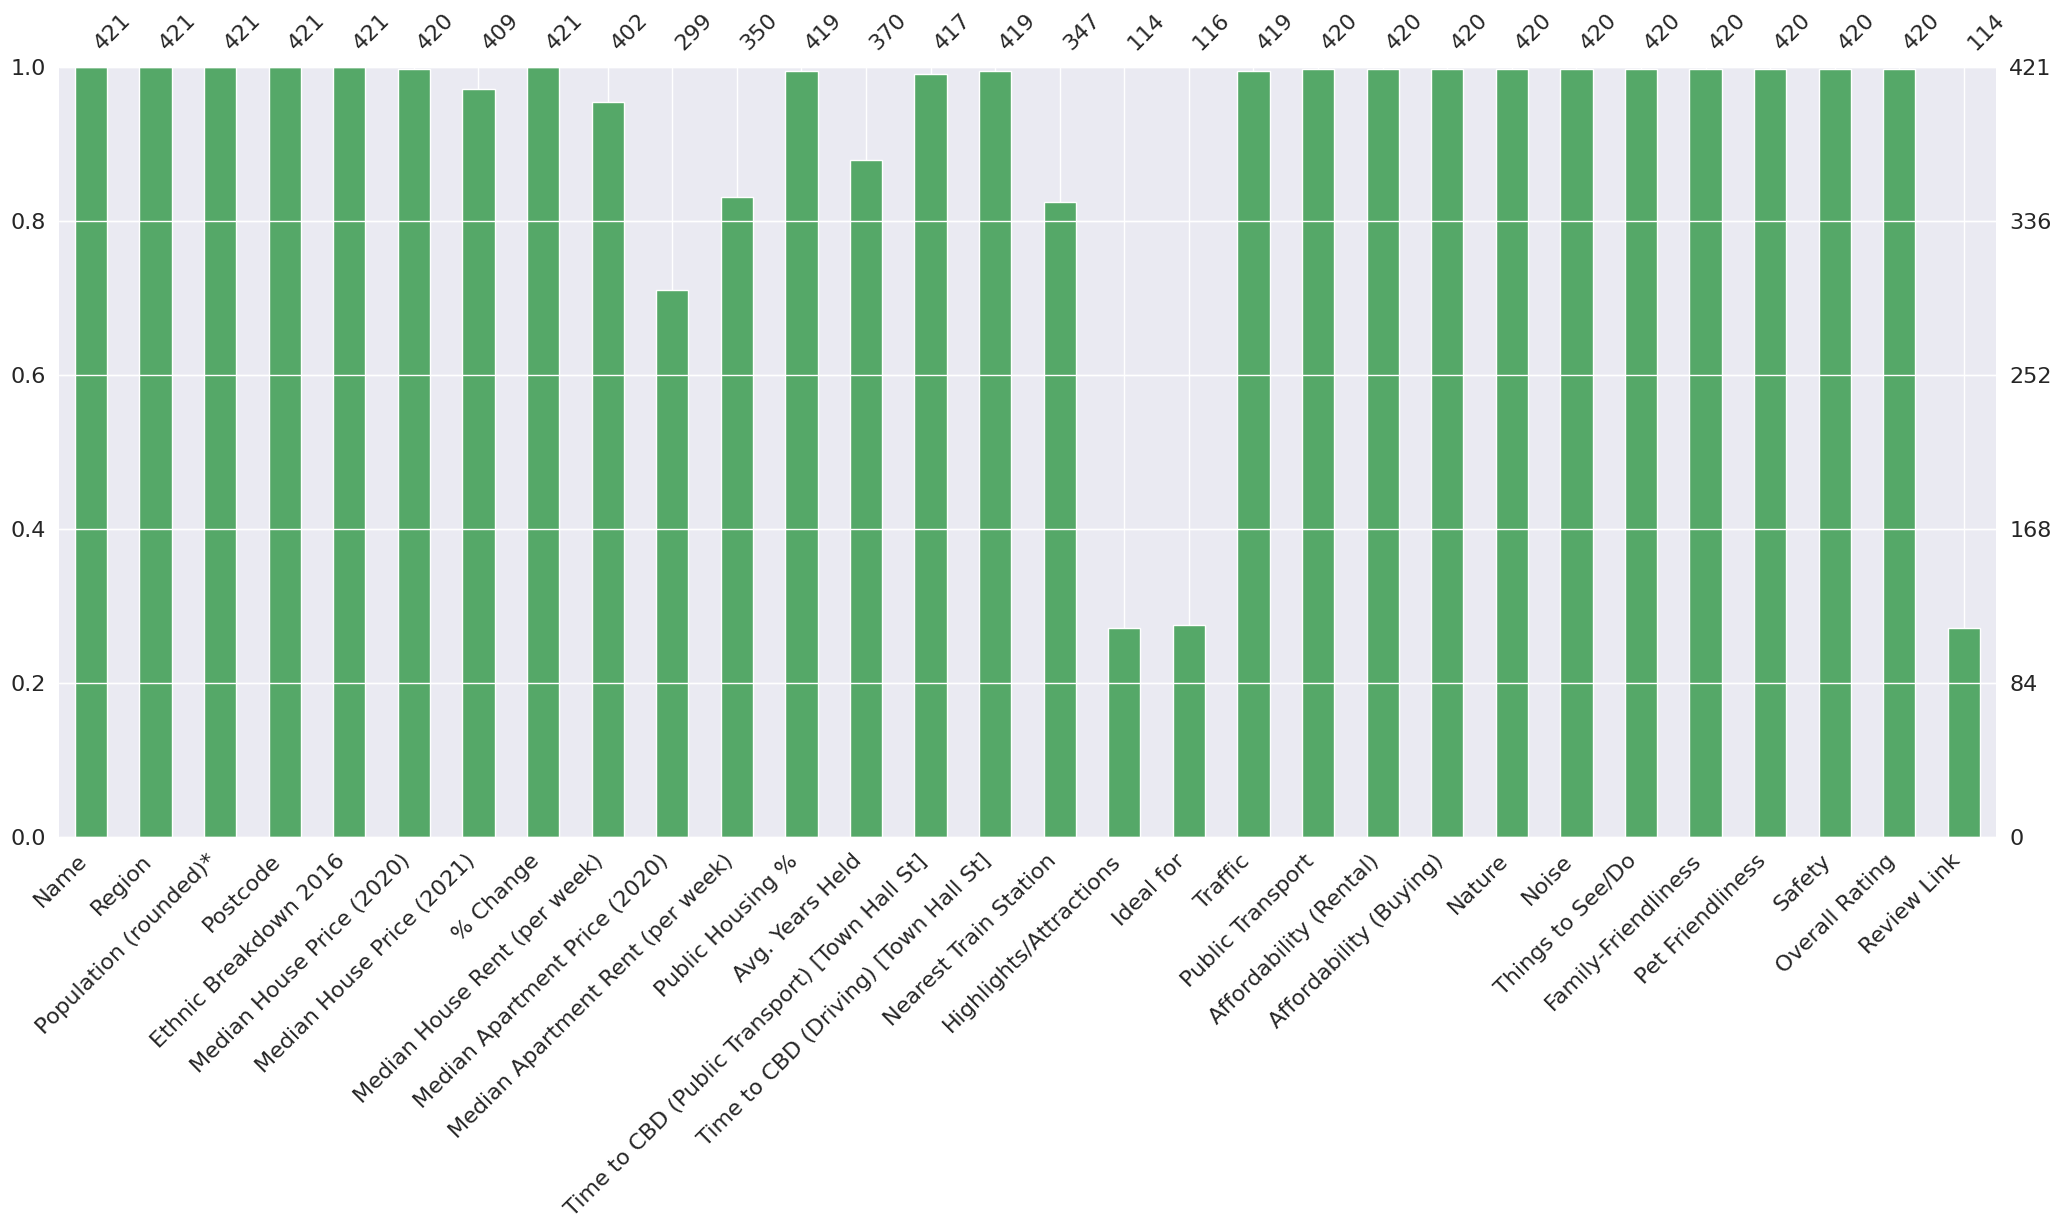

In [70]:
suburb_review.isna().sum()
print('Visualizing missing data')
msno.bar(suburb_review,color='g')

In [71]:
# FEATURE ENGINEERING
domain_df['price_per_square']=round((domain_df['price']/domain_df['property_size']),1)
domain_df['suburb_income_per_m2']=round((domain_df['suburb_median_income']/(domain_df['suburb_sqkm']*1000)),1)
domain_df['price_k']=round(domain_df['price']/1000,3)
domain_df['year_sold']=domain_df['date_sold'].dt.year
domain_df['month_sold']=domain_df['date_sold'].dt.month
domain_df['month_name_sold']=domain_df['date_sold'].dt.month_name().str[:3]

III.	Exploratory Data Analysis (EDA)
1. Summary Statistic

In [72]:
domain_df.describe()

,price,date_sold,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,price_per_square,suburb_income_per_m2,price_k,year_sold,month_sold
count,1.116000e+04,11160,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,1.675395e+06,2020-02-28 10:06:42.580645120,2.073566,3.758961,2.017473,723.012366,9311.560036,40168.243369,5.054877,-33.781413,151.096676,55.606720,0.631361,188.489686,27.381826,3729.221944,22.407267,1675.395267,2019.555108,7.637097
min,2.250000e+05,2016-01-11 00:00:00,0.000000,0.000000,0.000000,7.000000,22.000000,14248.000000,0.089000,-34.106240,150.553840,0.000000,0.100000,150.900000,0.310000,16.200000,0.400000,225.000000,2016.000000,1.000000
25%,1.002000e+06,2018-09-26 00:00:00,1.000000,3.000000,1.000000,430.000000,3977.000000,32448.000000,1.776000,-33.921480,150.951020,21.000000,0.100000,167.600000,12.960000,1519.800000,5.400000,1002.000000,2018.000000,5.000000
50%,1.388000e+06,2020-11-20 00:00:00,2.000000,4.000000,2.000000,600.000000,7457.000000,39104.000000,3.566000,-33.809180,151.109470,40.000000,0.110000,176.600000,22.310000,2377.250000,10.600000,1388.000000,2020.000000,8.000000
75%,2.020000e+06,2021-09-23 00:00:00,3.000000,4.000000,2.000000,765.000000,12158.250000,45552.000000,6.568000,-33.715510,151.227810,75.000000,1.500000,220.100000,40.990000,4100.500000,22.525000,2020.000000,2021.000000,11.000000
max,6.000000e+07,2022-01-01 00:00:00,46.000000,47.000000,50.000000,59100.000000,47176.000000,97500.000000,87.154000,-33.163760,151.573300,405.000000,2.000000,220.100000,84.790000,175000.000000,442.300000,60000.000000,2022.000000,12.000000
std,1.290371e+06,NaN,1.184881,1.559743,1.454560,1048.983662,7541.636246,11089.955120,5.824663,0.202478,0.213456,52.802315,0.658624,24.441552,18.470113,4446.024989,36.332469,1290.370963,1.740492,3.344624


In [73]:
#HANDLING OUTLIER

#Check domain df of outlier, if its size small and if remove it improve quality of data, remove it!
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])
domain_df_error=domain_df[(domain_df['type']!='Vacant land')&(domain_df['num_bath']==0)&(domain_df['num_bed']==0)&(domain_df['num_parking']==0)]
print('Domain Data not vacant land but all data of living spaces equal zero: ',domain_df_error.shape[0])

#Just 13 rows of outlier data
domain_df=domain_df.drop(domain_df_error.index,axis=0)
print('Domain Data after checking outlier with vancant land: ',domain_df.shape[0])

Domain Data before checking outlier with vancant land:  11160
Domain Data not vacant land but all data of living spaces equal zero:  13
Domain Data after checking outlier with vancant land:  11147


In [74]:
# Second, we start with the vacant_land but the num of living spaces is greater or equal 1, list it in a new data frame
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])
vacant_land_category_error=domain_df[((domain_df['num_bath']>0) | (domain_df['num_bed']>0) | (domain_df['num_parking']>0)) &(domain_df['type']=='Vacant land')]
print('Vancant land with number of bed, bath, parking greater than zero: ',vacant_land_category_error.shape[0])

#Remove it!
domain_df=domain_df.drop(vacant_land_category_error.index,axis=0)
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])

Domain Data before checking outlier with vancant land:  11147
Vancant land with number of bed, bath, parking greater than zero:  9
Domain Data before checking outlier with vancant land:  11138


In [75]:
vacant_land_category=domain_df[domain_df['type']=='Vacant land']
house_category=domain_df[domain_df['type']!='Vacant land']

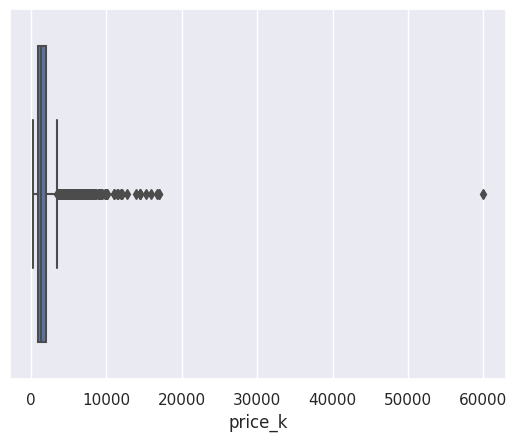

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,price_per_square,suburb_income_per_m2,price_k,year_sold,month_sold,month_name_sold
8214,60000000,2021-03-10,Kurraba Point,20,29,19,4240,House,1521,81744,0.235,-33.84211,151.2228,26,0.1,197.9,2.82,14150.9,347.8,60000.0,2021,3,Mar


In [76]:
sns.boxplot(x=domain_df['price_k'])
plt.show()
domain_df[domain_df['price_k']>50000]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


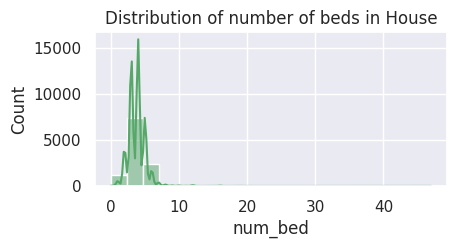

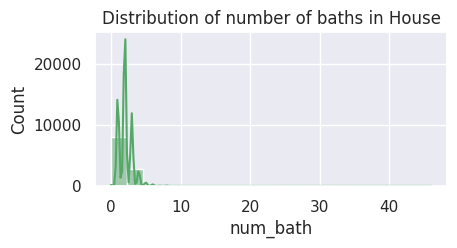

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


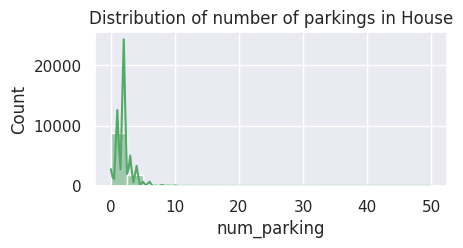

In [77]:
#Handling outlier of data in house type
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
sns.histplot(house_category['num_bed'], bins=20, kde=True, color='g')
plt.title('Distribution of number of beds in House')

plt.figure(figsize=(10, 2))
plt.subplot(1, 2,2)
sns.histplot(house_category['num_bath'], bins=20, kde=True,color='g')
plt.title('Distribution of number of baths in House')
plt.show()

plt.figure(figsize=(10, 2))
plt.subplot(1, 2,2)
sns.histplot(house_category['num_parking'], bins=20, kde=True,color='g')
plt.title('Distribution of number of parkings in House')
plt.show()

Most data distribured in range (0,10) for number of bedroom and number of parking.And (0,8) for bathromms

In [78]:
house_category=house_category[(house_category['num_bed']<=10)&(house_category['num_bath']<=8)&(house_category['num_parking']<=10)]
house_category.shape

(10927, 23)

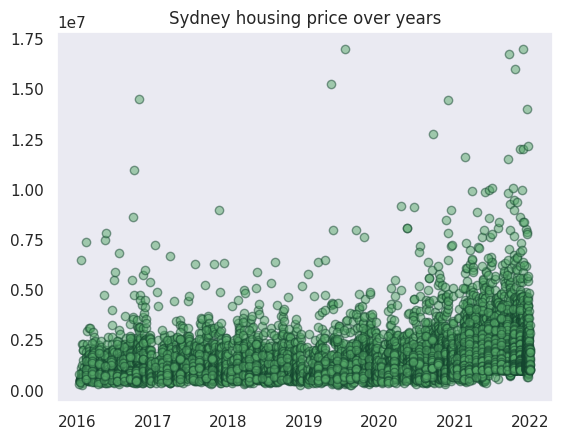

In [79]:
plt.scatter(house_category['date_sold'], house_category['price'], marker='o', c='g',edgecolor='#14452F', alpha=0.5)
plt.title("Sydney housing price over years")
plt.grid()
plt.show()

In [80]:
#Approach 1: Calculate percentile to see data range
qr=[0.0009, 0.001, 0.25, 0.5, 0.75, 0.9, 0.999]
for q in qr:
    print("{0:5,.2f} percentile: {1:15,.0f}".format(q*100, house_category['price'].quantile(q)))
l=0.0009
u=0.99
lq = house_category['price'].quantile(l)
uq = house_category['price'].quantile(u)

 0.09 percentile:         327,501
 0.10 percentile:         330,000
25.00 percentile:       1,010,000
50.00 percentile:       1,390,000
75.00 percentile:       2,015,000
90.00 percentile:       2,832,000
99.90 percentile:      12,000,000


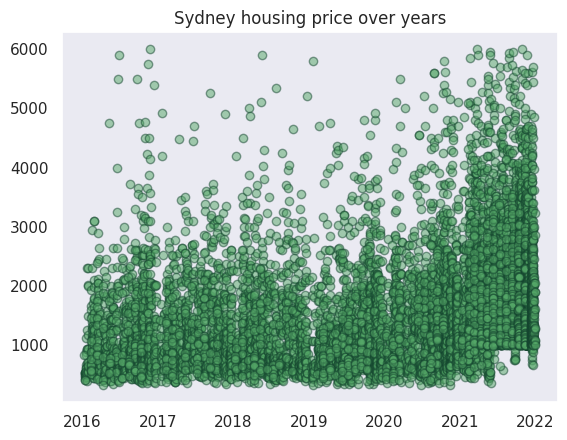

In [81]:
approach1_house_category=house_category.loc[(house_category['price']>=lq)&(house_category['price']<=uq) ]
plt.scatter(approach1_house_category['date_sold'], approach1_house_category['price_k'], marker='o', c='g',edgecolor='#14452F', alpha=0.5)
plt.title("Sydney housing price over years")
plt.grid()
plt.show()

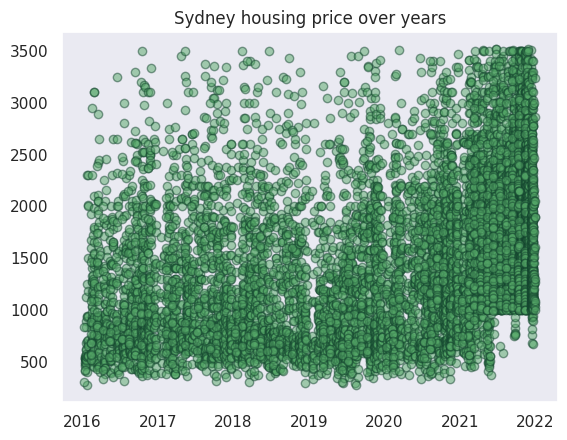

In [82]:
#Approach 2: remove outlier by calculating IQR to see data range, remove
q1 = house_category['price'].quantile(0.25)
q3 = house_category['price'].quantile(0.75)
iqr=q3-q1
l1=q1-1.5*iqr
l2=q3+1.5*iqr
approach2_house_category=house_category.loc[(house_category['price']>=l1)&(house_category['price']<=l2)]
plt.scatter(approach2_house_category['date_sold'], approach2_house_category['price_k'], marker='o', c='g',edgecolor='#14452F', alpha=0.5)
plt.title("Sydney housing price over years")
plt.grid()
plt.show()

In [83]:
#Compare 2 approaches:
#Calculate the percentage of each approach
print(house_category.shape)
print("Approach 1 remove outlier by calculating percentile to see data range, keep: ",round((approach1_house_category.shape[0]/house_category.shape[0]*100),4),"%")
print("Approach 2 remove outlier by calculating IQR to see data range, keep: ",round((approach2_house_category.shape[0]/house_category.shape[0]*100),4),"%")

(10927, 23)
Approach 1 remove outlier by calculating percentile to see data range, keep:  98.911 %
Approach 2 remove outlier by calculating IQR to see data range, keep:  94.8568 %


So we choose the approach 1:
After removing outlier, we have the clean dataset of house type:

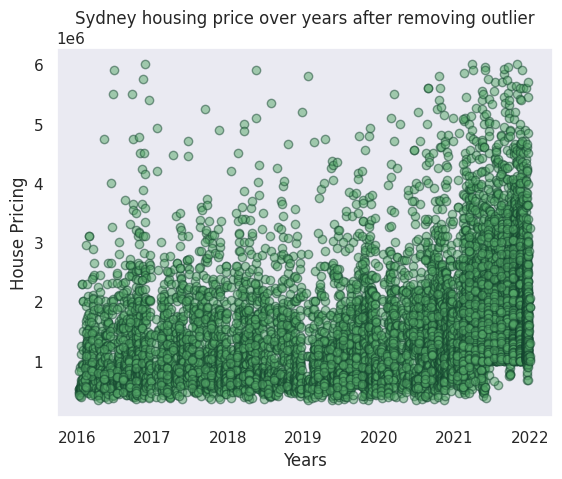

(10808, 23)

In [84]:
house_category=approach1_house_category
plt.scatter(house_category['date_sold'], house_category['price'], marker='o', c='g',edgecolor='#14452F', alpha=0.5)
plt.title("Sydney housing price over years after removing outlier")
plt.xlabel('Years')
plt.ylabel('House Pricing')
plt.grid()
plt.show()
house_category.shape

2. Data Analysis and Visualization
In this point, we try to solve the questions below:
* What is the relationship between price with other factors (for example: distance from CBD)?

Text(0.5, 1.0, 'Relationship between Price of House and its distance to CBD')

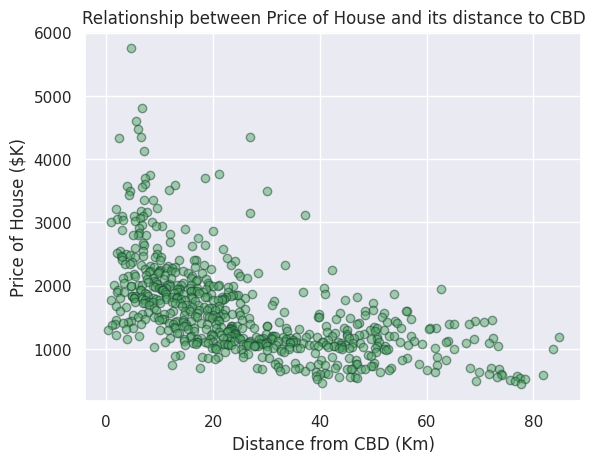

In [85]:
sb_df=house_category.groupby(by='suburb')['price_k'].median().sort_values(ascending=False)
sb_distance=house_category.groupby(by='suburb')['km_from_cbd'].median()
sb_dis_price_relationship=pd.merge(sb_df, sb_distance, on='suburb', how='inner').reset_index()
plt.scatter(sb_dis_price_relationship['km_from_cbd'],sb_dis_price_relationship['price_k'], marker='o', c='g',edgecolor='#14452F', alpha=0.5)
plt.ylabel('Price of House ($K)')
plt.xlabel('Distance from CBD (Km)')
plt.title("Relationship between Price of House and its distance to CBD")

Text(0.5, 1.0, 'Relationship between value of property size and income of suburb citizen')

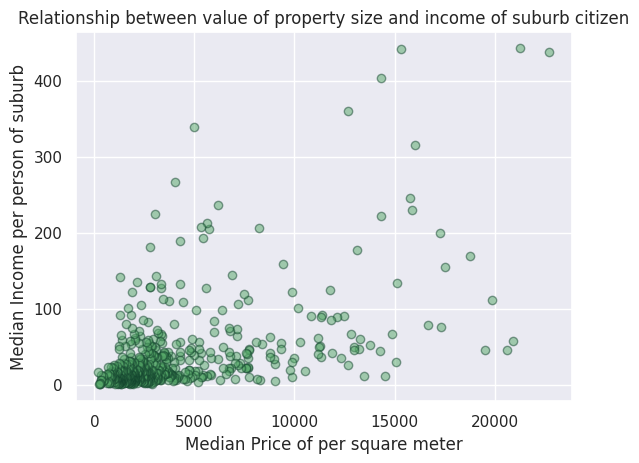

In [86]:
sb_price_per_m2=house_category.groupby('suburb')['price_per_square'].median().sort_values(ascending=False)
sb_income=house_category.groupby(by='suburb')['suburb_income_per_m2'].median()
sb_income_price_relationship=pd.merge(sb_price_per_m2, sb_income, on='suburb', how='inner').reset_index()
#sb_income_price_relationship
plt.scatter(sb_income_price_relationship['price_per_square'],sb_income_price_relationship['suburb_income_per_m2'], marker='o', c='g',edgecolor='#14452F', alpha=0.5)
plt.xlabel('Median Price of per square meter')
plt.ylabel('Median Income per person of suburb')
plt.title("Relationship between value of property size and income of suburb citizen")

Text(0.5, 1.0, 'Relationship between House Price and Size of Property(size<5000)')

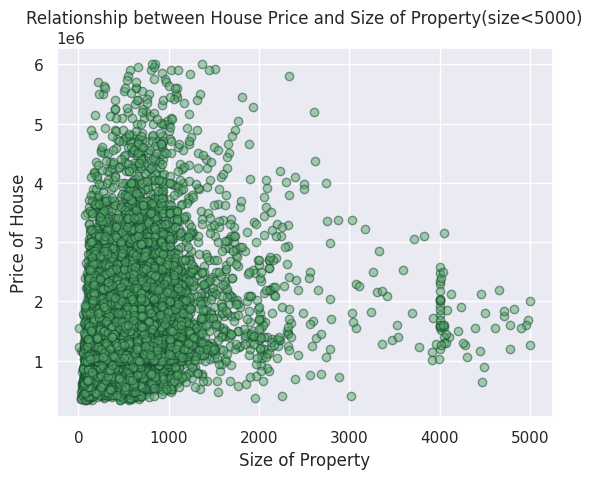

In [87]:
#sb_income_price_relationshi
house_category_copy=house_category.copy()
house_category_copy=house_category_copy[house_category_copy['property_size']<=5000]
plt.scatter(house_category_copy['property_size'],house_category_copy['price'], marker='o', c='g',edgecolor='#14452F', alpha=0.5)
plt.xlabel('Size of Property')
plt.ylabel('Price of House')
plt.title("Relationship between House Price and Size of Property(size<5000)")

We can say that with the data of house pricing in Sydney from 2017 to 2021, the house pricing doen not depend on property size that much, it more depends on location, suburb condition and human factor more.

Text(0, 0.5, 'Total number of transaction')

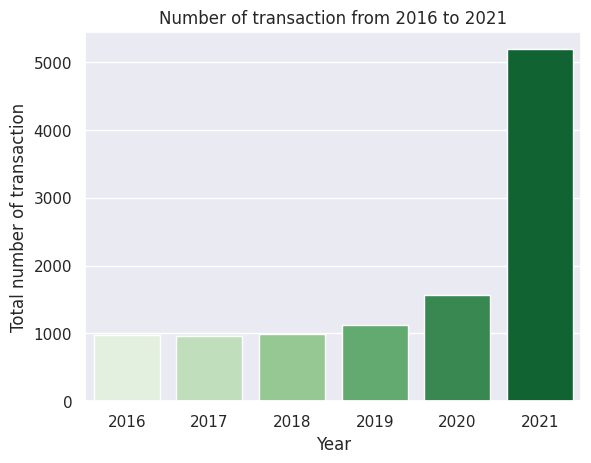

In [88]:
transactions=house_category['year_sold'].value_counts().reset_index()
transactions=transactions.head(6)

sns.barplot(data=transactions,x=transactions['year_sold'],y=transactions['count'],palette='Greens')
plt.title('Number of transaction from 2016 to 2021')
plt.xlabel('Year')
plt.ylabel('Total number of transaction')

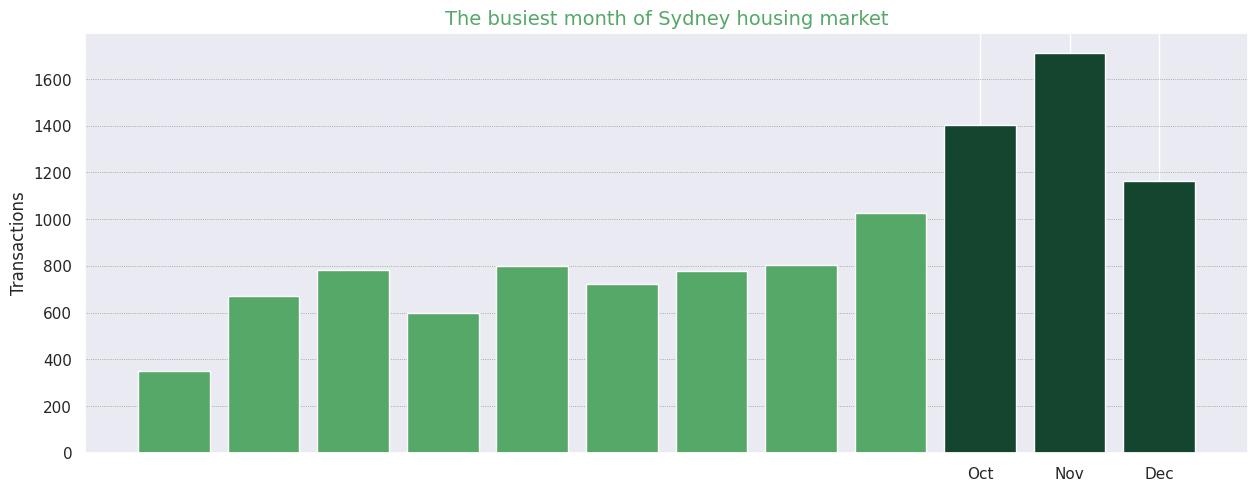

In [89]:
month_df = house_category.groupby(['month_sold', 'month_name_sold']).agg(
    count=('date_sold', 'count'), 
    median_price=('price', 'median')
).reset_index().sort_values(by='month_sold', ascending=True)
plt.figure(figsize=(15, 12))

# Sorting the DataFrame by count column and selecting the top three months
top_months = month_df.sort_values(by='count', ascending=False).head(3)

# Define colors
light_color = 'g'
deep_color = '#14452F'

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
month_df_copy = month_df.copy()
month_df_copy['color'] = light_color

# Setting color for top three months
month_df_copy.loc[month_df_copy['month_sold'].isin(top_months['month_sold']), 'color'] = deep_color

# Plotting

ax1 = plt.subplot(2, 1, 1)
ax1.bar('month_sold', 'count', data=month_df_copy, color=month_df_copy['color'])
ax1.set_ylabel('Transactions')
ax1.set_xticks(top_months['month_sold'])
ax1.set_xticklabels(top_months['month_name_sold'])  # Using month names as x-tick labels for top months
ax1.set_title("The busiest month of Sydney housing market", fontdict={'fontsize':14, 'color':'g'})
ax1.grid(axis='y', color='grey', linestyle=':', linewidth=0.5)

plt.show()

In [90]:
suburb_review.rename(columns={'Name':'Suburb', 'Ethnic Breakdown 2016':'Ethnic'}, inplace=True)
dataset=house_category.merge(suburb_review, left_on='suburb',
                  right_on='Suburb').drop('Suburb', axis='columns')


In [91]:
dataset.to_csv('data_region.csv', index=False)

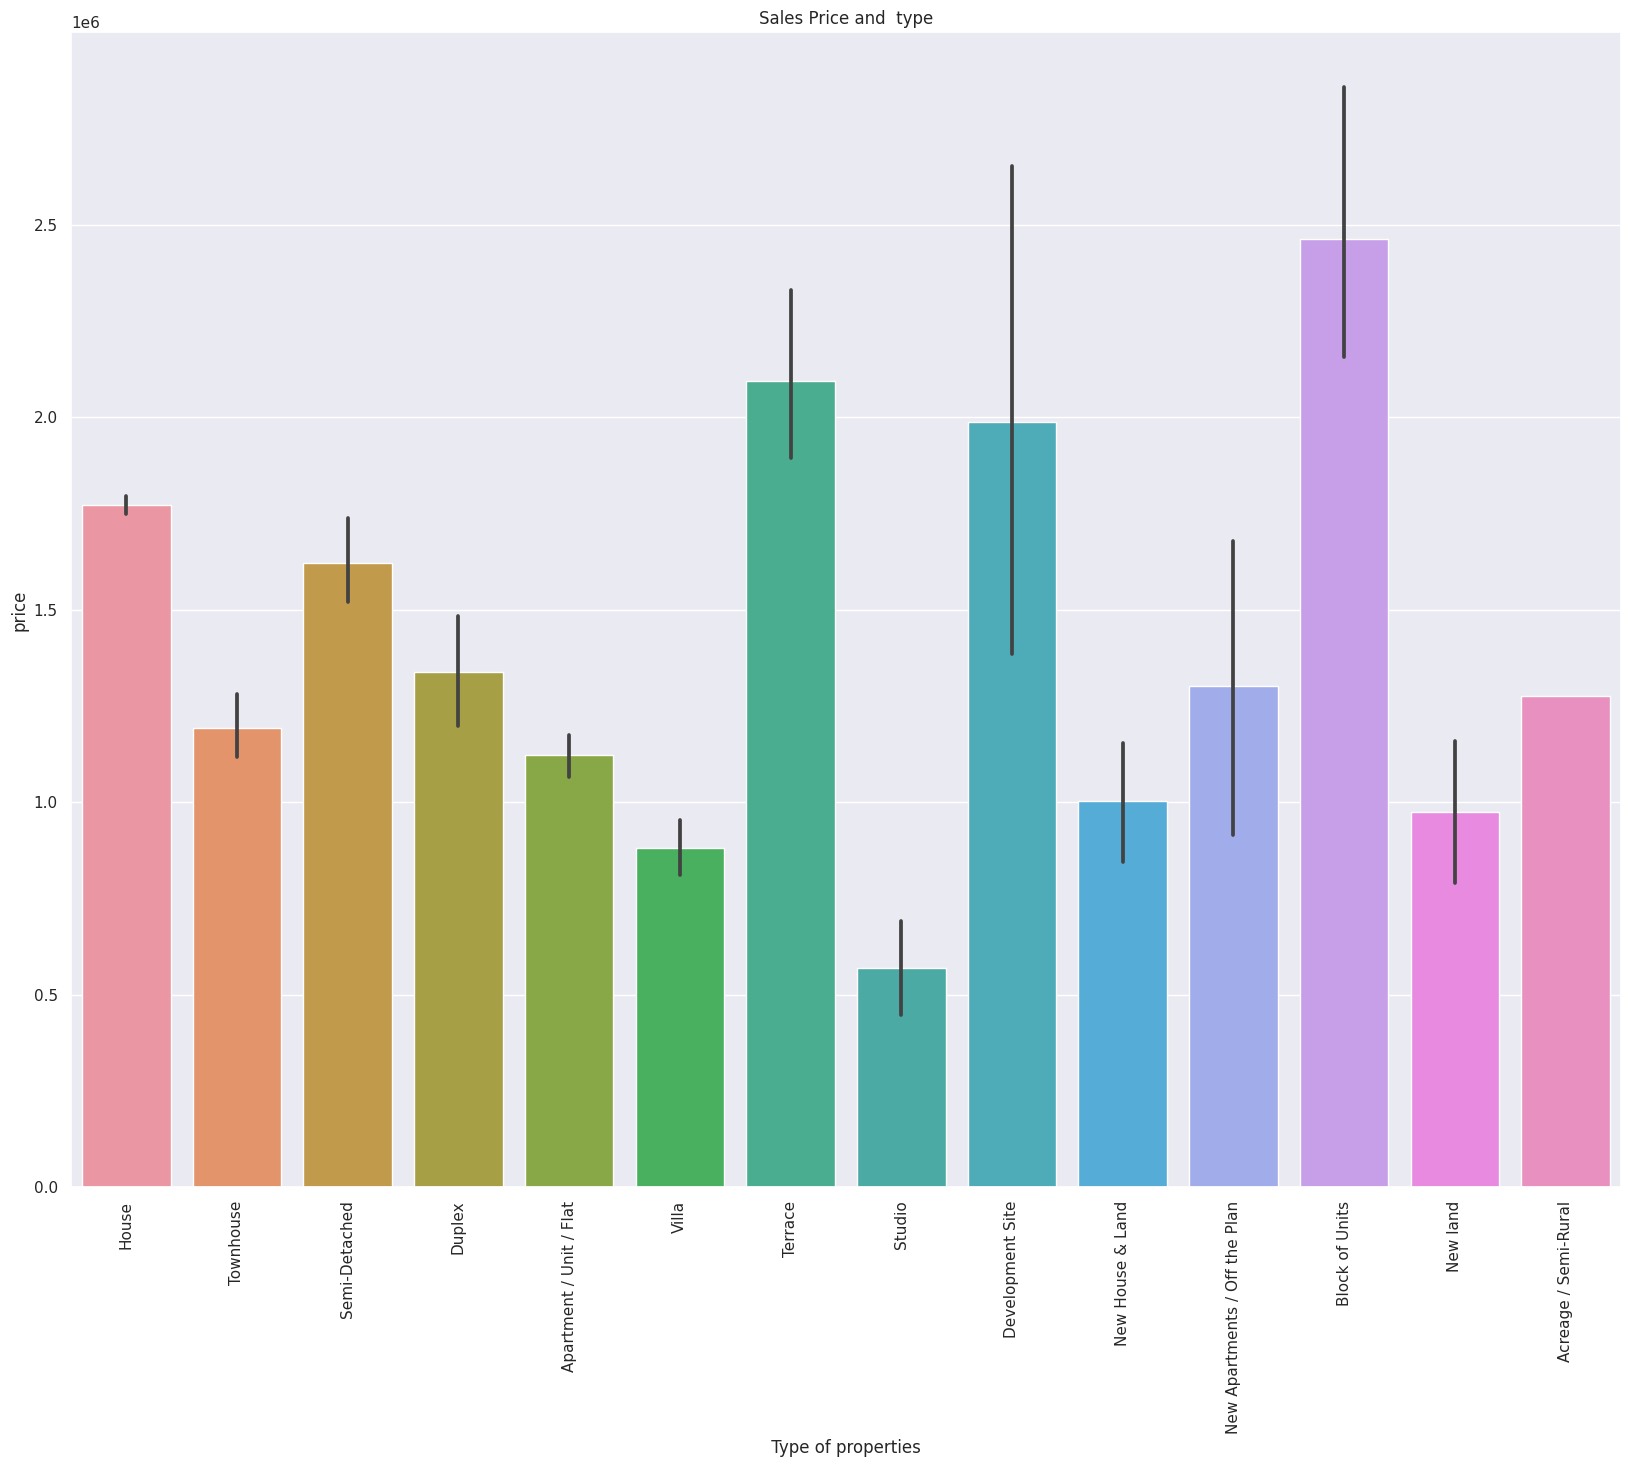

In [92]:
sns.set()
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(1,1,figsize=(20,15),sharex=False)

sns.barplot(ax=ax,data =dataset, x="type", y="price" )
ax.set_ylabel("price")
ax.set_xlabel(" Type of properties ")
ax.title.set_text("Sales Price and  type")
plt.xticks(rotation='vertical')
plt.show()

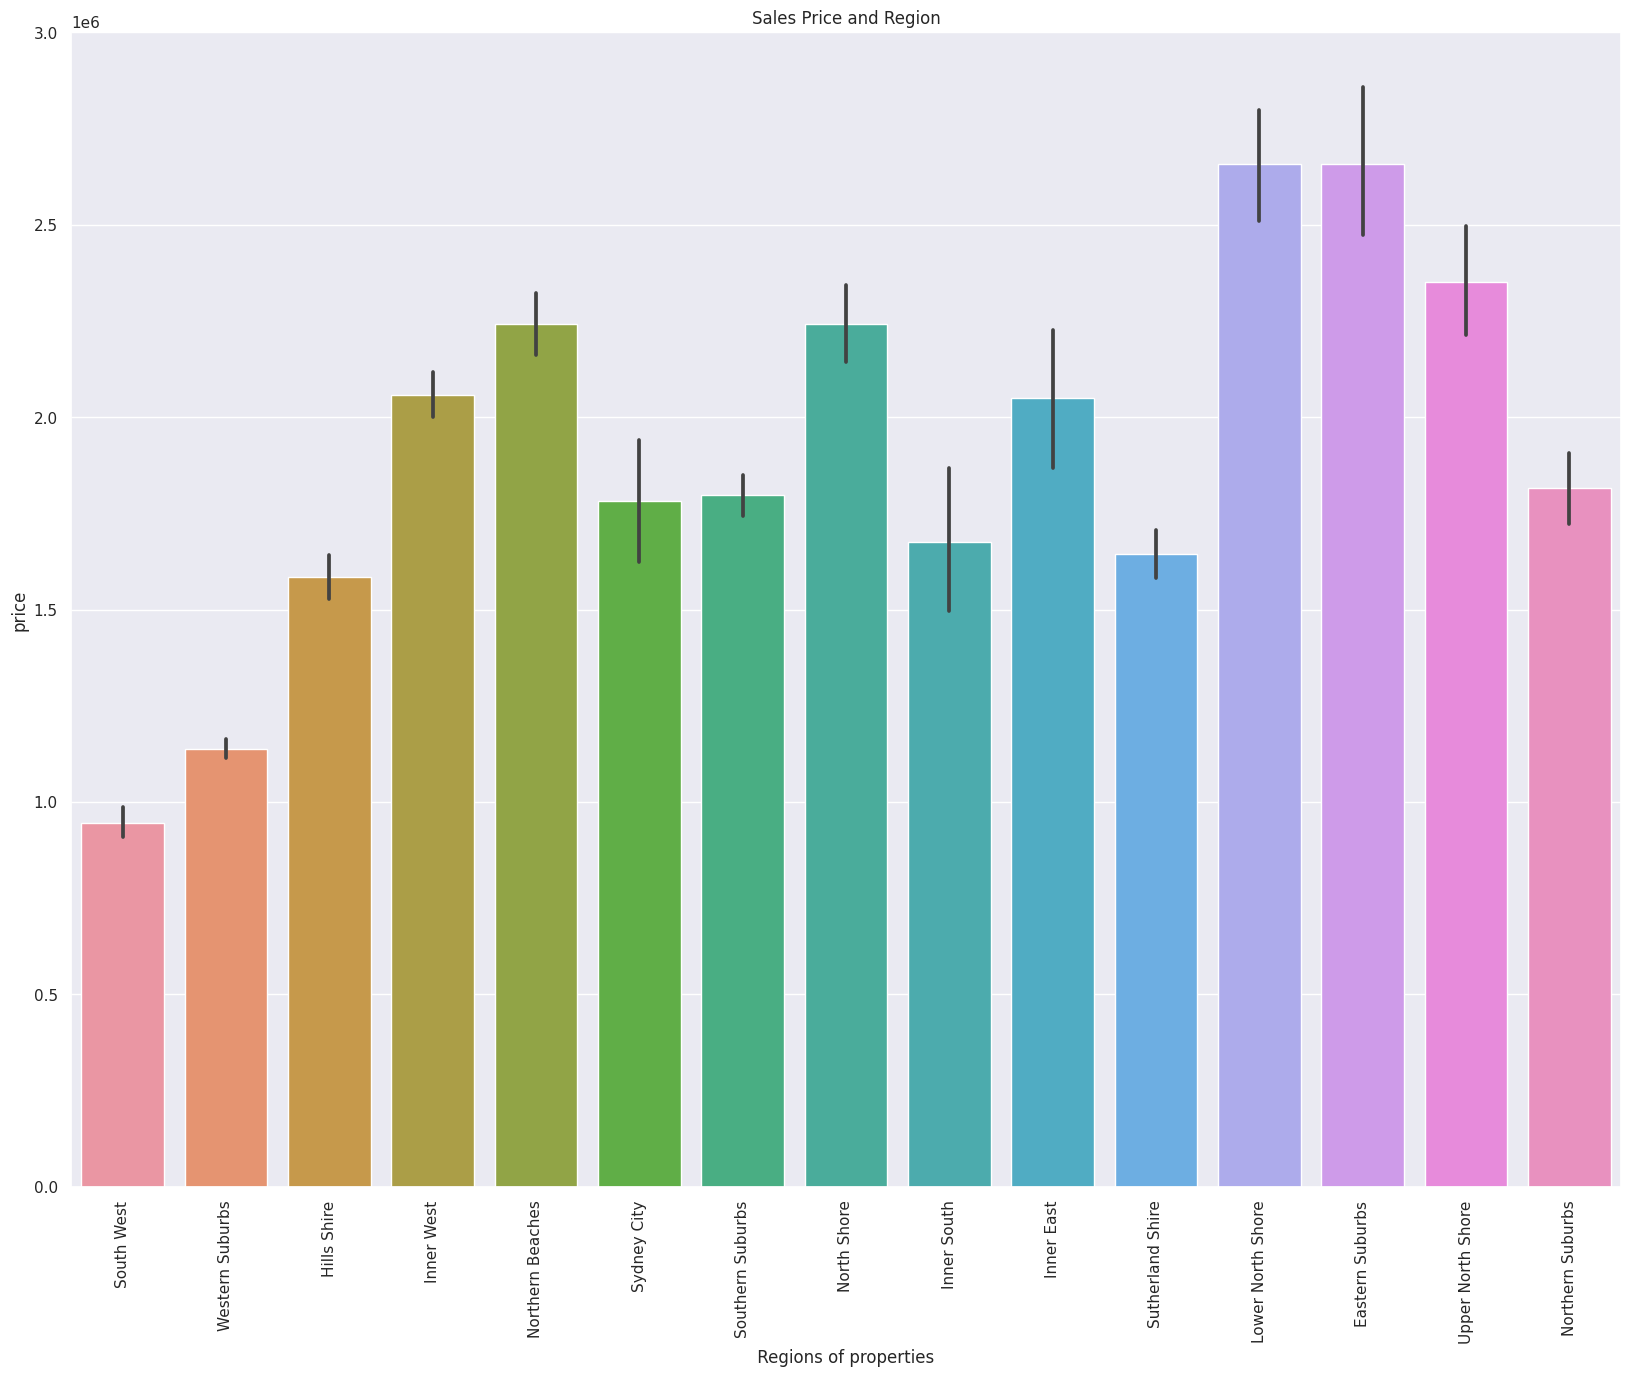

In [93]:
sns.set()
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(1,1,figsize=(20,15),sharex=False)

sns.barplot(ax=ax,data =dataset, x="Region", y="price" )
ax.set_ylabel("price")
ax.set_xlabel(" Regions of properties ")
ax.title.set_text("Sales Price and Region")
plt.xticks(rotation='vertical')
plt.show()

In [94]:
#Map:
map_data=dataset.groupby('Region')['price'].mean().reset_index()
map_data_region = dataset.groupby('Region')[['suburb_lat', 'suburb_lng']].mean().reset_index()
mapdata=pd.merge(map_data_region,map_data, on='Region',how='inner')
mapdata.head(3)
mapdata.to_csv('map_data_region.csv', index=False)
#using tabeau to display map and dashboard

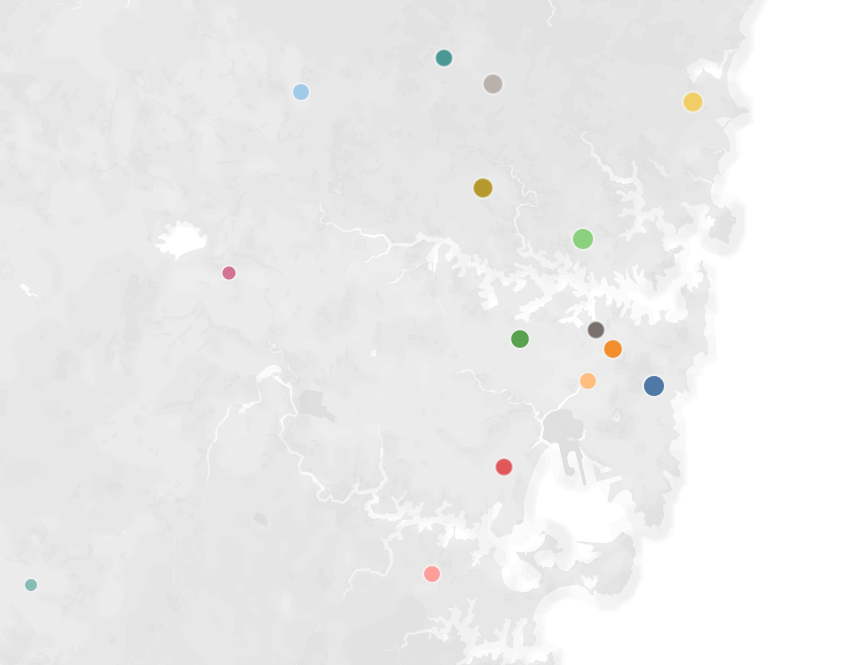

In [95]:
pd.set_option('display.max_columns', None)
dataset.head(1)

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,price_per_square,suburb_income_per_m2,price_k,year_sold,month_sold,month_name_sold,Region,Population (rounded)*,Postcode,Ethnic,Median House Price (2020),Median House Price (2021),% Change,Median House Rent (per week),Median Apartment Price (2020),Median Apartment Rent (per week),Public Housing %,Avg. Years Held,Time to CBD (Public Transport) [Town Hall St],Time to CBD (Driving) [Town Hall St],Nearest Train Station,Highlights/Attractions,Ideal for,Traffic,Public Transport,Affordability (Rental),Affordability (Buying),Nature,Noise,Things to See/Do,Family-Friendliness,Pet Friendliness,Safety,Overall Rating,Review Link
0,452000,2016-01-13,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12,1314.0,8.0,452.0,2016,1,Jan,South West,"10,000",2560,"Australian 23.0%, English 22.7%, Irish 6.8%, S...","$590,000.00","$680,000.00",15.25%,$385.00,"$380,000.00",$345.00,10%,12.7,60 minutes,50 minutes,Leumeah,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


IV. Data Prediction
1. Data Preparation for predictor

In [96]:
#ALL_Types_of_Regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from time import time
import scipy as sp
from sklearn.svm import SVR

In [97]:
prediction_df= dataset.copy
prediction_df=dataset.drop(['date_sold','suburb_lat','suburb_lng','Postcode','Region','type','suburb','year_sold','month_name_sold','Population (rounded)*','Ethnic','Median House Price (2020)','Median House Price (2021)','% Change','Median House Rent (per week)','Median Apartment Price (2020)','Median Apartment Rent (per week)','Public Housing %','Nearest Train Station','Highlights/Attractions','Ideal for','Traffic','Public Transport','Affordability (Rental)','Affordability (Buying)','Nature','Noise','Things to See/Do','Family-Friendliness','Pet Friendliness','Safety','Overall Rating','Review Link','price_per_square','price_k'], axis='columns')
prediction_df['Time to CBD (Public Transport) [Town Hall St]']=prediction_df['Time to CBD (Public Transport) [Town Hall St]'].str.replace('minutes','').str.replace('minuntes', '').astype('float')
prediction_df['Time to CBD (Driving) [Town Hall St]']=prediction_df['Time to CBD (Driving) [Town Hall St]'].str.replace('minutes','').str.replace('mins', '').astype('float')

#clean the dataset again
prediction_df.isna().sum()
prediction_df.fillna(prediction_df.mean(), inplace=True)
prediction_df.isna().sum()
X=prediction_df.drop(['price'],axis=1)
y=prediction_df['price']
prediction_df.head(5)

,price,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,suburb_income_per_m2,month_sold,Avg. Years Held,Time to CBD (Public Transport) [Town Hall St],Time to CBD (Driving) [Town Hall St]
0,452000,1,3,1,344,9835,32292,4.055,81,2.0,150.9,40.12,8.0,1,12.7,60.0,50.0
1,495000,1,3,2,582,9835,32292,4.055,81,2.0,150.9,40.12,8.0,1,12.7,60.0,50.0
2,890000,2,4,3,715,6160,40560,3.859,33,2.0,150.9,22.31,10.5,1,12.2,60.0,35.0
3,533000,3,4,2,695,5973,24180,2.429,37,2.0,150.9,39.53,10.0,1,11.2,65.0,50.0
4,1120500,2,4,2,904,7965,40092,5.462,92,2.0,150.9,20.61,7.3,1,17.1,60.0,35.0


In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
scaler=StandardScaler()
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test=scaler.transform(X_test)

In [99]:
#run the model
def run_model(model,X_train,X_test,y_train,y_test):
    Scaled_X_train=scaler.fit_transform(X_train).round()
    Scaled_X_test=scaler.transform(X_test).round()
    model.fit(Scaled_X_train,y_train)
    preds=model.predict(Scaled_X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
#Linear_Regression
lr_model=LinearRegression()
run_model(lr_model,X_train,X_test,y_train,y_test)
preds=lr_model.predict(Scaled_X_test)

MAE: 425985.5486704349
RMSE: 598423.9447611744


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


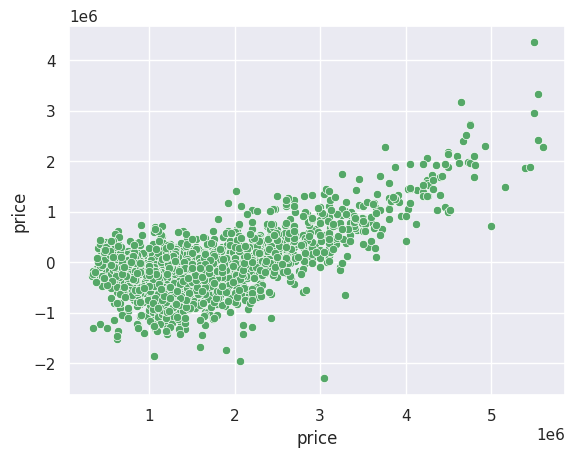

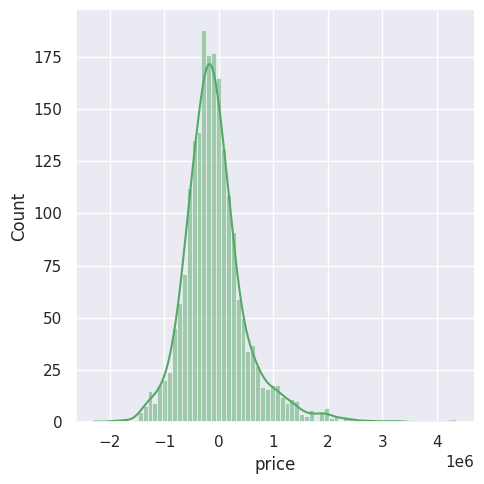

In [100]:
residuals=y_test-preds
residuals
sns.scatterplot(x=y_test,y=residuals,color='g')
sns.displot(residuals,kde=True,color='g')

LinearRegression()

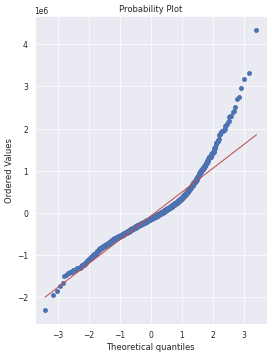

In [101]:
import scipy as sp
g,ax=plt.subplots(figsize=(6,8),dpi=50)
_=sp.stats.probplot(residuals,plot=ax)
final_model=LinearRegression()
final_model.fit(X_train,y_train)

So the linear regression is not suitable in this situation


Text(0, 0.5, 'Housing Price')

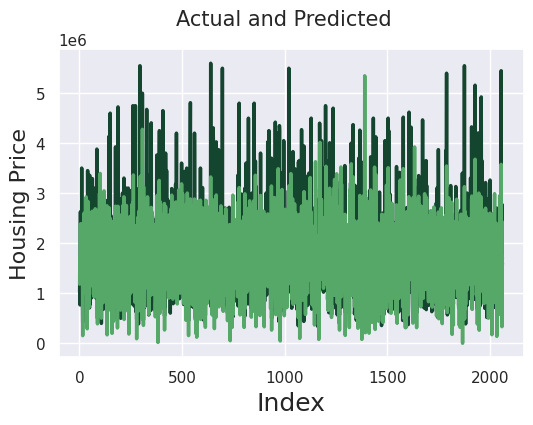

In [102]:
c = [i for i in range(1,2063,1)] # generating index 
fig = plt.figure(figsize=(6,4))
plt.plot(c,y_test, color="#14452F", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,preds, color="g",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)   

In [103]:
print(final_model.coef_)

[ 1.62629516e+05  1.95689231e+05  7.15177905e+04  2.40255348e+02
 -5.53698498e-01  2.16456804e+01  1.48356191e+03  3.69076232e+02
 -6.50355562e+04  7.58220265e+03 -3.87541611e+04  2.62248226e+02
 -2.20874377e+03  2.38943280e+03  1.68540492e+03  2.58339667e+03]


In [104]:
print(final_model.intercept_)

-1366979.7759248014


In [105]:

rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end=time()
train_time_rand=end-start
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)

In [106]:
print(final_model.coef_)

[ 1.62629516e+05  1.95689231e+05  7.15177905e+04  2.40255348e+02
 -5.53698498e-01  2.16456804e+01  1.48356191e+03  3.69076232e+02
 -6.50355562e+04  7.58220265e+03 -3.87541611e+04  2.62248226e+02
 -2.20874377e+03  2.38943280e+03  1.68540492e+03  2.58339667e+03]


In [107]:
print(final_model.intercept_)

-1366979.7759248014


In [108]:
start = time()
rand_regr = RandomForestRegressor(n_estimators=400,random_state=0).fit(X_train, y_train)
end=time()
train_time_rand=end-start
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)

In [109]:
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5,min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
end=time()
train_time_g=end-start
gradient=est.score(X_test,y_test)
pred = est.predict(X_test)
exp_est = explained_variance_score(pred,y_test)

In [110]:
start = time()
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start
pred=ada.predict(X_test)
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
exp_ada = explained_variance_score(predict,y_test)

In [111]:
start = time()
decision=DecisionTreeRegressor().fit(X_train, y_train)
end=time()
train_time_dec=end-start
decc=decision.score(X_test,y_test)
decpredict = decision.predict(X_test)
exp_dec = explained_variance_score(decpredict,y_test)

In [112]:
# Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree'],
    'Score': [gradient,adab,random,decc],
     'Variance Score': [exp_est,exp_ada,exp_rand,exp_dec]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
0,Gradient Boosting,0.756741,0.713368
2,Random Forest,0.744322,0.656928
1,AdaBoost,0.537067,0.122204
3,Decision Tree,0.501079,0.536222


V. CONCLUSION